In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# After mounting, navigate to where you uploaded book.txt in your Drive
file_path = "/content/drive/MyDrive/LinkdinPostprojects /book.txt"

with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

print(text[:500])  # preview first 500 characters


﻿
Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Charac


In [3]:
# # Step 1: Install dependencies (if needed)
# !pip install tensorflow numpy

#  Step 2: Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
text = text.lower().split()[:20000]

print("Sample words:", text[:50])


Sample words: ['\ufeff', 'project', "gutenberg's", 'the', 'adventures', 'of', 'sherlock', 'holmes,', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'you', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with']


In [5]:
# Step 4: Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
total_words = len(tokenizer.word_index) + 1
print("Total unique words:", total_words)

Total unique words: 3535


In [6]:
# Convert words to sequences of integers
input_sequences = []
X_length = 5  # length of input sequence (you can change to experiment)

for i in range(X_length, len(text)):
    seq = text[i-X_length:i+1]  # input + next word
    encoded = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    if len(encoded) == X_length+1:
        input_sequences.append(encoded)

print("Total sequences:", len(input_sequences))

Total sequences: 16086


In [7]:

# Step 5: Split into input (X) and output (y)
input_sequences = np.array(input_sequences)
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# One-hot encode the output
y = to_categorical(y, num_classes=total_words)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (16086, 5)
y shape: (16086, 3535)


In [8]:
# Step 6: Build the model
model = Sequential()
model.add(Embedding(total_words, 64, input_length=X_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# history = model.fit(X, y, epochs=10, batch_size=128, verbose=1)

In [10]:
history = model.fit(
    X, y,
    epochs=10,
    batch_size=128,
    verbose=1,
    validation_split=0.1
)


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.0317 - loss: 7.4729 - val_accuracy: 0.0516 - val_loss: 6.5273
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.0587 - loss: 6.2321 - val_accuracy: 0.0516 - val_loss: 6.5645
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0589 - loss: 6.0982 - val_accuracy: 0.0516 - val_loss: 6.5336
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.0576 - loss: 5.9763 - val_accuracy: 0.0516 - val_loss: 6.6328
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0589 - loss: 5.9190 - val_accuracy: 0.0516 - val_loss: 6.7362
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.0650 - loss: 5.7640 - val_accuracy: 0.0522 - val_loss: 6.7281
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0696 - loss: 5.6309 - val_accuracy: 0.0541 - val_loss: 6.8292
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.0803 - loss: 5.5077 - val_accu

In [11]:
# Step 8: Function to predict next word
def predict_next_word(model, tokenizer, text_seq, X_length=5):
    encoded = tokenizer.texts_to_sequences([text_seq])[0]
    encoded = pad_sequences([encoded], maxlen=X_length, truncating='pre')
    y_pred = model.predict(encoded, verbose=0)
    predicted_word = tokenizer.index_word[np.argmax(y_pred)]
    return predicted_word

In [12]:
# Step 9: Test the model
test_input = "sherlock holmes was sitting in"
predicted_word = predict_next_word(model, tokenizer, test_input, X_length)
print(f"Input: {test_input}")
print(f"Predicted next word: {predicted_word}")

Input: sherlock holmes was sitting in
Predicted next word: the


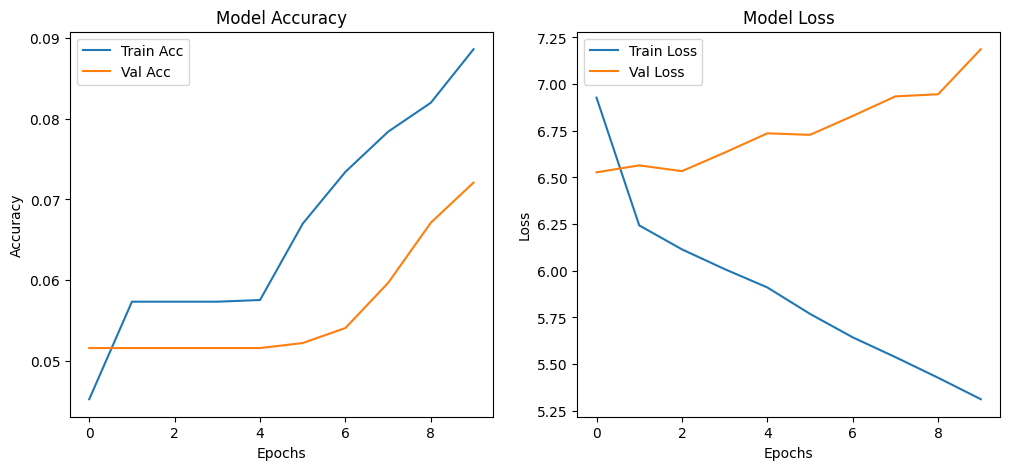

In [15]:
import matplotlib.pyplot as plt
#  Plot accuracy & loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.0466 - loss: 7.3410 - val_accuracy: 0.0516 - val_loss: 6.4715
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.0560 - loss: 6.2043 - val_accuracy: 0.0516 - val_loss: 6.4507
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.0562 - loss: 6.0297 - val_accuracy: 0.0516 - val_loss: 6.5209
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.0587 - loss: 5.9311 - val_accuracy: 0.0541 - val_loss: 6.6144
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.0753 - loss: 5.7168 - val_accuracy: 0.0597 - val_loss: 6.7336


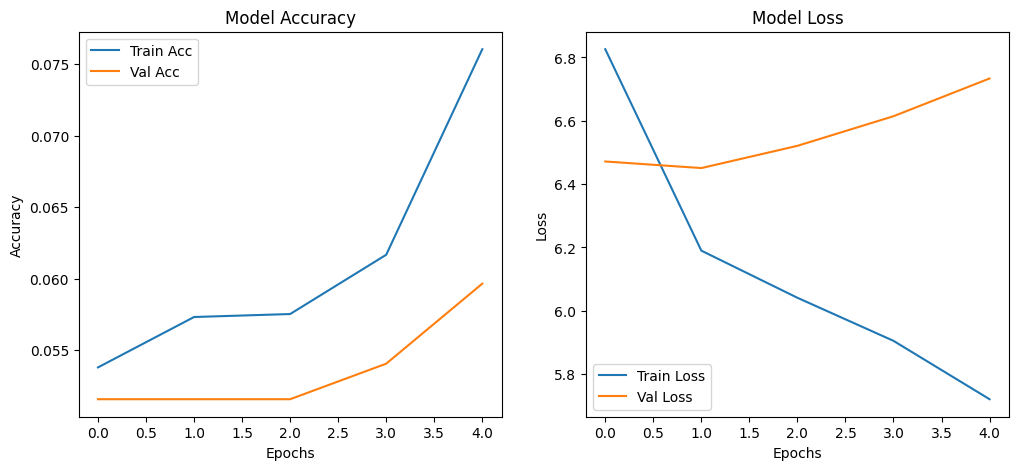

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Step 1: Build improved model
model = Sequential()
model.add(Embedding(total_words, 128, input_length=X_length))  # bigger embeddings
model.add(LSTM(256, return_sequences=False))                   # larger LSTM
model.add(Dropout(0.3))                                        # prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 2: Add EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,           # stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

#  Step 3: Train the model with validation split
history = model.fit(
    X, y,
    epochs=30,            # more epochs (early stopping will prevent overtraining)
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Plot accuracy & loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
